DAT405 Assignment 3

Theodor Jendle - 9901134339 - 

Carl Hjalmarsson - 9305198930 - 

In [135]:
import nbdime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

3


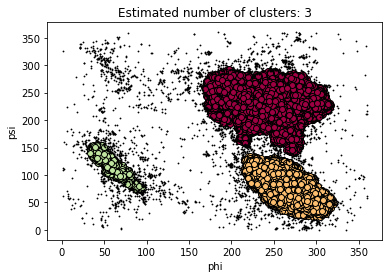

In [136]:
protein_data = pd.read_csv("assignment3-data.csv", index_col = False)
angle_data = protein_data[['residue','phi', 'psi']]
shifted_angles = angle_data.copy(deep=True)
shifted_angles["phi"] = shifted_angles["phi"] + 350
shifted_angles["psi"] = shifted_angles["psi"] + 95
shifted_angles["phi"] = shifted_angles["phi"].mod(360)
shifted_angles["psi"] = shifted_angles["psi"].mod(360)


# parameters for DBSCAN (alternatives: 19 and 280)
epsilon = 10
min_samples = 63
db = DBSCAN(eps = epsilon, min_samples=min_samples).fit(shifted_angles[["phi", "psi"]])

# Code below inspired by module 3 materials which in turn is based on https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
labels = db.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)
unique_labels = set(labels) 
colors = [plt.cm.Spectral(each) 
          for each in np.linspace(0, 1, len(unique_labels))] 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        col = [0, 0, 0, 1] 
    class_member_mask = (labels == k) 
    phi_psi = shifted_angles[class_member_mask & core_samples_mask] 
    plt.plot(phi_psi["phi"], phi_psi["psi"], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=6) 
    phi_psi = shifted_angles[class_member_mask & ~core_samples_mask] 
    plt.plot(phi_psi["phi"], phi_psi["psi"], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=0.8) 
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel("phi")
plt.ylabel("psi") 
plt.show()

### a)
#### 1)
Since we have approximately 30000 data points, we need high minimum number of neighbors (mnn) in order to create a core. Otherwise, with a low requirement of mnn, the number of clusters will spike. We also reasoned that if the mnn is too high clusters located near to each other will merge, when keeping the radius epsilon constant. Looking at the literature, Martin Ester et. al. state in *'A Density-Based Algorithm for Discovering Clusters
in Large Spatial Databases with Noise'*, that when looking at two-dimensional data, the **MinPts** parameter, here donoted mnn, can be kept at size 4. We found this not to be the case. When looking at stackexchange, we got an advise to not rely on automatic methods to choose mnn, but rather to relay on domain knowledge. For our case we do not have extensive domain knowledge, however with trial and error, knowledge of the size of the data set, as well as with the reasoning above we found a good requirement value for the mnn to be 63.

#### 2)
With trial and error we found that, when minimum neighbors was 63, for epsilon values greater than 10 the yellow and red cluster merged into one. From previous analysis we know that these two clusters should be seperated, hence we set the epsilon value to 10.

In [137]:
number_of_outliers = 0
for outliers in labels:
    if outliers == -1:
        number_of_outliers += 1

print("The number of outliers found in our case is: {}".format(number_of_outliers))


The number of outliers found in our case is: 1907


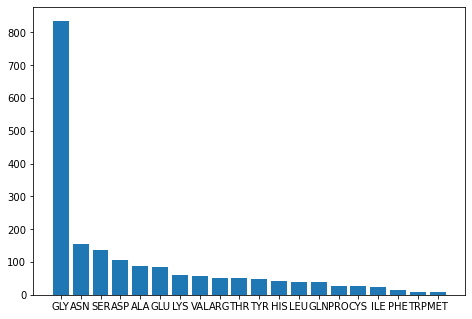

In [138]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
protein_outlier_data = phi_psi["residue"].value_counts()
ax.bar(protein_outlier_data.index, protein_outlier_data.values)
plt.show()

In [139]:
print("Silhouette score: %0.3f" % silhouette_score(shifted_angles[["phi", "psi"]], labels))

Silhouette score: 0.627


### c)
DBSCAN proves to perform less well in regards to the silhouette score, 
### d)
As found when performing trial and error in part 3.a) we found that the DBSCAN is not robust to small changes. Small changes of the parameters often resulted in different partitions of the data. For example when adjusting the epsilon parameter to a bigger value, the clusters had a risk of merging, when it was not wanted to. Same for adjusting the number of neighbors to create a core, if it was adjusted to small new small clusters could appear which also was not wanted. Therefor DBSCAN is very sensitive to the choice of parameters.